**Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading CSV File**

In [3]:
df=pd.read_csv("/content/Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


**Other Details about the Dataset**

In [4]:
df.shape

(9994, 11)

In [5]:
df.size

109934

In [6]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [8]:
df.index

RangeIndex(start=0, stop=9994, step=1)

**Data Cleaning**

In [9]:
df.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [10]:
df[df.duplicated]

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State


**Data Preparation**

In [11]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed")

In [12]:
df['Order Date']

,Order Date
0,2017-11-08
1,2017-11-08
2,2017-06-12
3,2016-10-11
4,2016-10-11
...,...
9989,2015-12-24
9990,2015-07-12
9991,2017-06-06
9992,2018-10-16


In [13]:
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month_name()
df["Date"] = df["Order Date"].dt.day

In [14]:
df.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month,Date
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,November,8
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,November,8


In [15]:
df["Category"].value_counts()

,count
Category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400
Food Grains,1398
Oil & Masala,1361


In [16]:
df["Sub Category"].value_counts()

,count
Sub Category,
Health Drinks,719
Soft Drinks,681
Cookies,520
Breads & Buns,502
Chocolates,499
Noodles,495
Masalas,463
Biscuits,459
Cakes,452


In [17]:
df.pivot_table(index="Year", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Year,,,,,,,
2015,433979,409091,482982,356704,409212,423918,459713
2016,487965,425719,462055,438736,468441,412725,436318
2017,504263,543575,565101,609338,516400,564196,569039
2018,686074,706928,757263,710494,706674,637603,772476


In [18]:
df.pivot_table(index="Month", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Month,,,,,,,
April,123181,151748,143530,128790,138084,157369,155751
August,162277,152976,149694,182850,140885,124935,133190
December,298939,265806,344238,291656,311754,270309,305374
February,54701,60188,58331,62983,74313,62044,83542
January,69139,91775,74158,79531,80753,95324,87292
July,168795,137856,151179,166926,162689,149179,152761
June,154397,140633,181754,128165,153431,129080,170348
March,154253,143575,165977,140169,126704,142637,180665
May,135113,163490,173024,143356,152491,182725,136721


**Exploratory Data Analysis(EDA)**

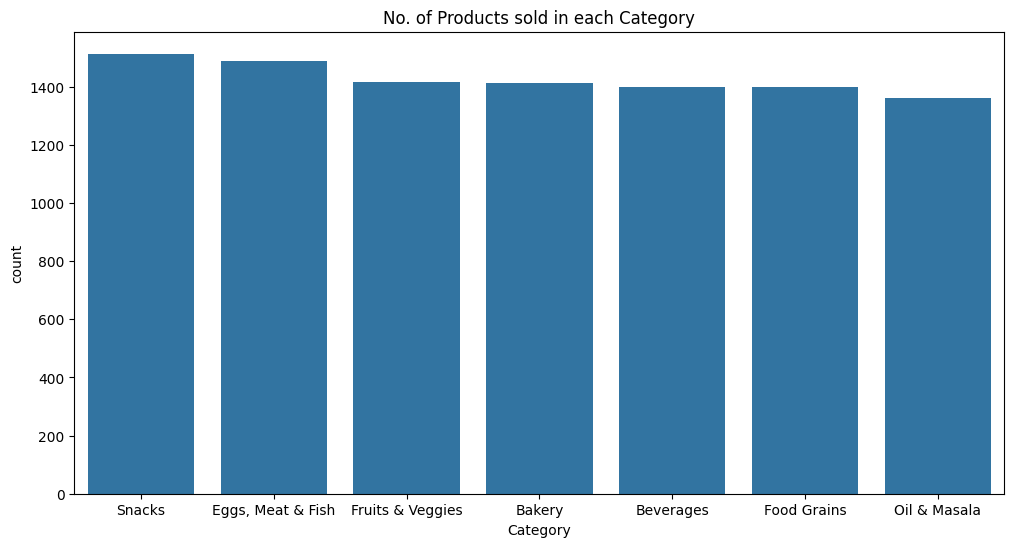

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='Category',order=df["Category"].value_counts().index)
plt.title("No. of Products sold in each Category")
plt.show()

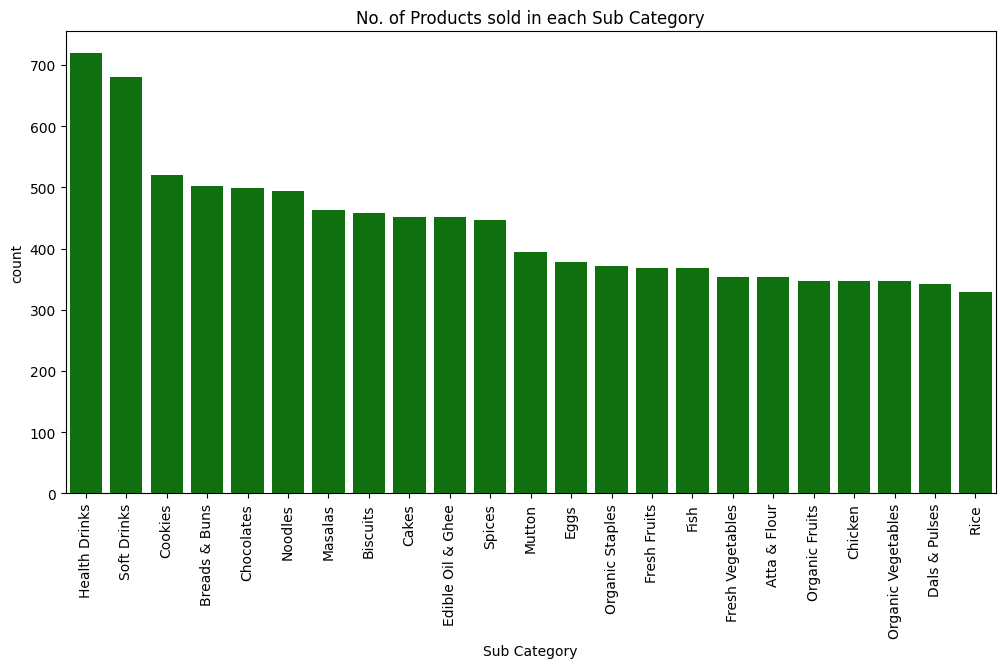

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='Sub Category',color='green',order=df["Sub Category"].value_counts().index)
plt.title("No. of Products sold in each Sub Category")
plt.xticks(rotation=90)
plt.show()

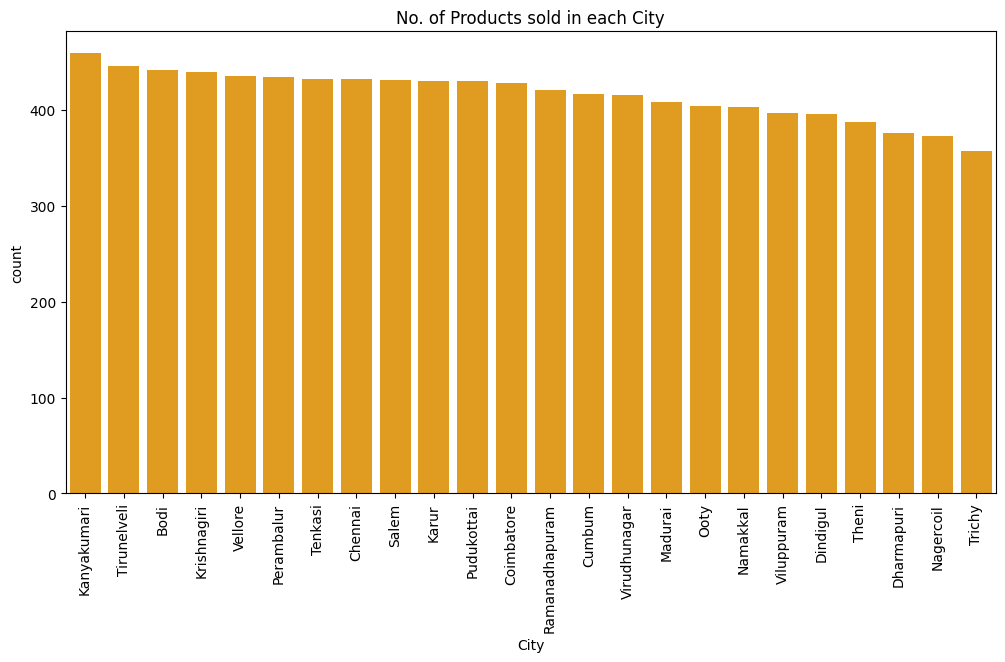

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='City',color='orange',order=df["City"].value_counts().index)
plt.title("No. of Products sold in each City")
plt.xticks(rotation=90)
plt.show()

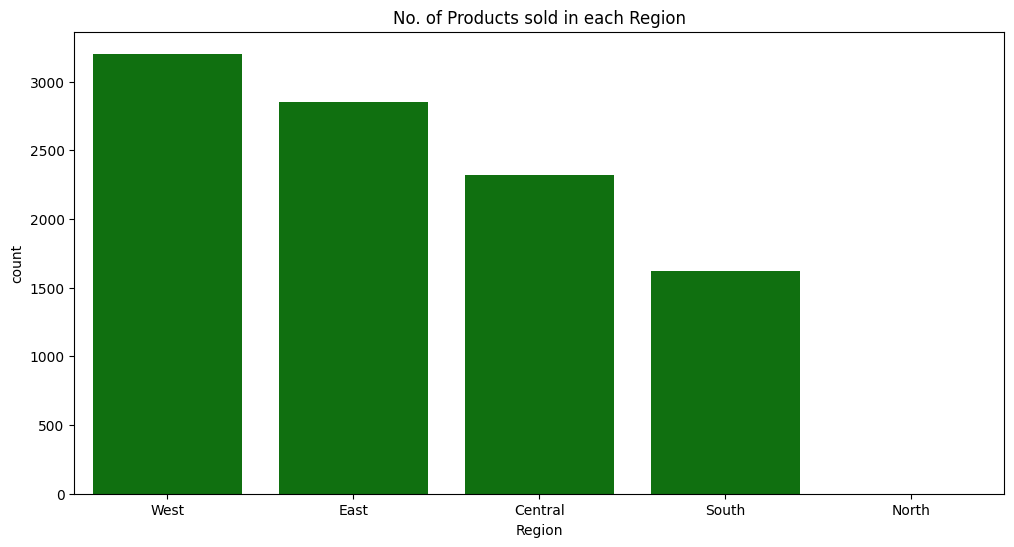

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='Region',color='green',order=df["Region"].value_counts().index)
plt.title("No. of Products sold in each Region")
plt.show()

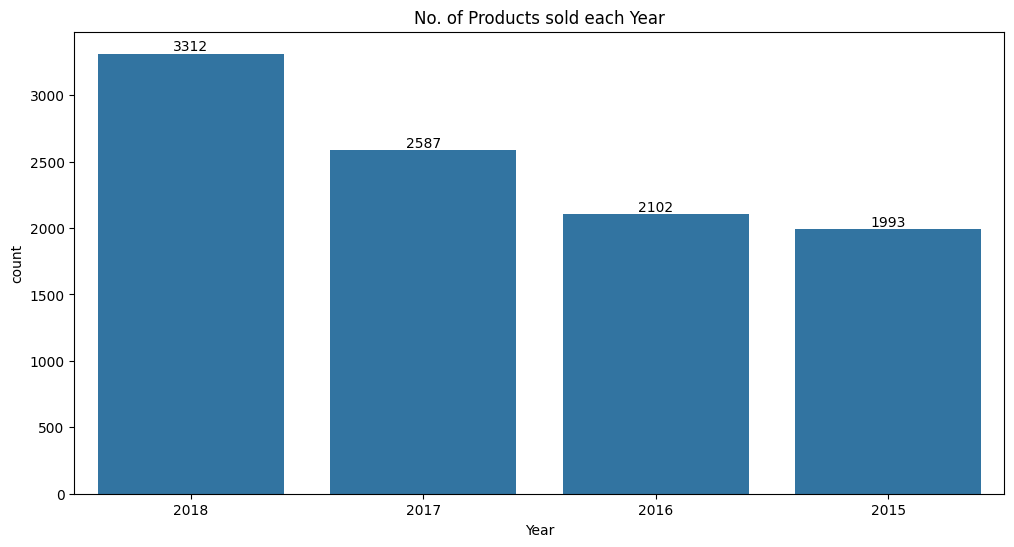

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Year", order=df["Year"].value_counts().index)
ax.set_title("No. of Products sold each Year")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

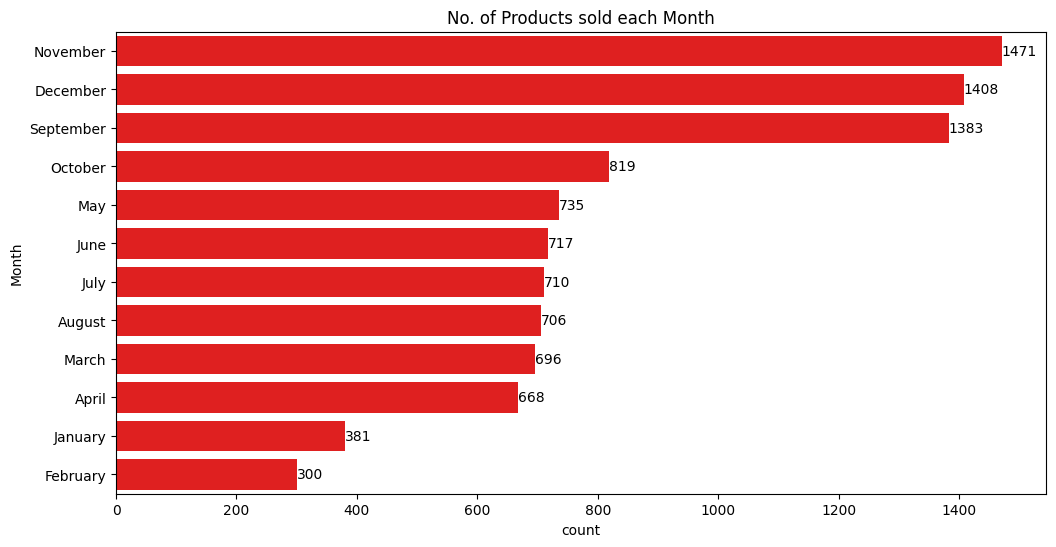

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, y="Month", color="red", order=df["Month"].value_counts().index)
ax.set_title("No. of Products sold each Month")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()